In [76]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

import sim

%matplotlib notebook

importlib.reload(sim)

<module 'sim' from '/home/lev/maker/bancor-bs/sim.py'>

In [77]:
# initial conditions of reserve
initial_dai = 270000
initial_bnt = 55000
initial_daibnt = 92000
reserve_fee = 0.00

reserve = sim.Reserve(initial_dai, initial_bnt, initial_daibnt=initial_daibnt, fee=reserve_fee)
print("Reserve has {} BNT and {} DAI".format(reserve.bal_bnt, reserve.bal_dai))
print("BNT/DAI price is {}".format(reserve.get_mid_price()))
print("NAV of reserve fund is {} dai".format(reserve.bal_dai + reserve.bal_bnt*reserve.get_mid_price()))
print("\n")
print("Reserve will sell 10 BNT at {}".format(reserve.get_buy_price(10)))
print("Reserve will buy 10 BNT at {}".format(reserve.get_sell_price(10)))

Reserve has 55000 BNT and 270000 DAI
BNT/DAI price is 4.909089819053775
NAV of reserve fund is 539999.9400479577 dai


Reserve will sell 10 BNT at 4.909272727241491
Reserve will buy 10 BNT at 4.908198509367523


<IPython.core.display.Javascript object>


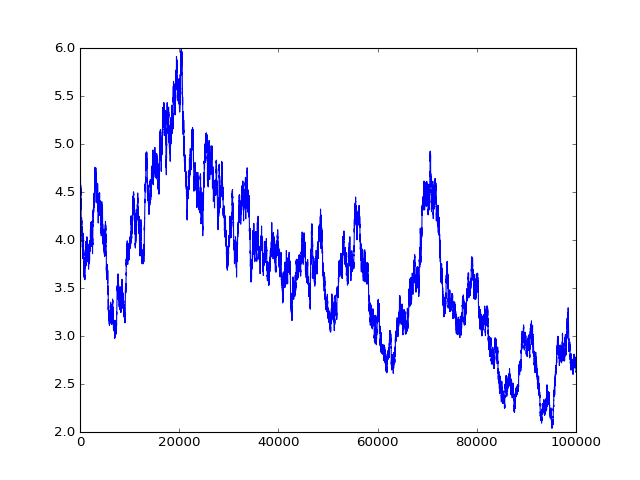

In [78]:
simulation_steps = 100000

np.random.seed(14)
# geometric brownian motion
prices = sim.simulate_geometric_wiener(simulation_steps, reserve.get_mid_price(), sigma=.01)
# GARCH(1, 1)
#prices = sim.simulate_garch_prices(simulation_steps, start_price=reserve.get_mid_price())

fig, ax = plt.subplots()
ax.plot(prices)

In [79]:
# simulate arbitrage trading
trader_dai, trader_bnt, bals_dai, bals_bnt = sim.sim_arb_trading(reserve, prices)

In [80]:
# trader's balances at the end of the simulation
trader_dai, trader_bnt

(58001.474340411063, 0.0)

In [81]:
print("Reserve has {} BNT and {} DAI".format(reserve.bal_bnt, reserve.bal_dai))
print("BNT/DAI price is {}".format(reserve.get_mid_price()))
print("NAV of reserve fund is {} dai".format(reserve.bal_dai + reserve.bal_bnt*reserve.get_mid_price()))

Reserve has 75159.30841646972 BNT and 197580.3172344806 DAI
BNT/DAI price is 2.6288158319276578
NAV of reserve fund is 395160.2971164299 dai


<IPython.core.display.Javascript object>


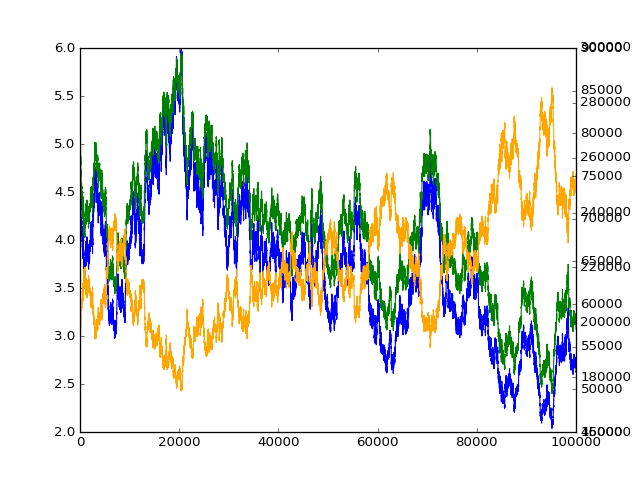

In [82]:
fig, ax = plt.subplots()
ax.plot(prices)

ax2 = ax.twinx()

ax3 = ax.twinx()

ax2.plot(bals_dai, color='green')
ax3.plot(bals_bnt, color='orange')